#### Case Study #2

There is 1 dataset(csv) with 3 years worth of customer orders. There are 4 columns in the csv dataset: index, CUSTOMER_EMAIL(unique identifier as hash), Net_Revenue, and Year.
For each year we need the following information:
•	Total revenue for the current year
•	New Customer Revenue e.g. new customers not present in previous year only
•	Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year
•	Revenue lost from attrition
•	Existing Customer Revenue Current Year
•	Existing Customer Revenue Prior Year
•	Total Customers Current Year
•	Total Customers Previous Year
•	New Customers
•	Lost Customers
Additionally, generate a few unique plots highlighting some information from the dataset. Are there any interesting observations?



##### Observations on the Dataset
1. We observe that every year the revenue has almost remained constant with a slight drop in 2016 and then an increase in 2017
2. There is an increasing trend of count of customers from the year 2016 till 2017
3. There is no correlations between the attributes given
4. All the customer records are unique

## Start of the Python program for DDA Case Study 2


Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

Read the casestudy.csv file

In [2]:
df = pd.read_csv(r'C:/Users/Chrisia/OneDrive - stevens.edu/Documents/Resume/casestudy.csv', sep=',')

Display of the given customer orders dataset

In [3]:
df.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [4]:
df.shape

(685927, 4)

1. Total revenue for the current year for each year is

In [5]:
df.groupby('year')['net_revenue'].sum()

year
2015    29036749.19
2016    25730943.59
2017    31417495.03
Name: net_revenue, dtype: float64

2. New Customer Revenue e.g. new customers not present in previous year only

In [6]:
df['customer_email'].unique

<bound method Series.unique of 0          nhknapwsbx@gmail.com
1          joiuzbvcpn@gmail.com
2          ukkjctepxt@gmail.com
3          gykatilzrt@gmail.com
4          mmsgsrtxah@gmail.com
                  ...          
685922     qzqttwiftu@gmail.com
685923     pjodiifjop@gmail.com
685924     appaplmgko@gmail.com
685925     wvkpmwsgck@gmail.com
685926     aregboumbw@gmail.com
Name: customer_email, Length: 685927, dtype: object>

Since all customer entries are unique, there are no duplicate records of customers so every year the customers are unique

In [7]:
df[df['year']==2017].net_revenue

435940     96.61
435941    176.00
435942     73.47
435943    138.17
435944    156.87
           ...  
685922    184.58
685923    133.03
685924    200.98
685925    235.35
685926    208.43
Name: net_revenue, Length: 249987, dtype: float64

3. Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year

In [8]:
Existing_customer_growth = df[df['year']==2017].net_revenue.sum() - df[df['year']==2016].net_revenue.sum()
Existing_customer_growth

5686551.440000016

4. Revenue lost from attrition

In [9]:
revenue_lost_from_attrition = df[df['year']==2017].net_revenue.sum() - df[df['year']==2016].net_revenue.sum()
revenue_lost_from_attrition

5686551.440000016

5. Existing Customer Revenue Current Year


In [10]:
df[df['year']==2017].net_revenue

435940     96.61
435941    176.00
435942     73.47
435943    138.17
435944    156.87
           ...  
685922    184.58
685923    133.03
685924    200.98
685925    235.35
685926    208.43
Name: net_revenue, Length: 249987, dtype: float64

6. Existing Customer Revenue Prior Year


In [11]:
df[df['year']==2016].net_revenue

231294    197.26
231295     38.28
231296    154.57
231297    102.47
231298     32.03
           ...  
435935    114.17
435936    169.79
435937     79.71
435938    116.80
435939     37.31
Name: net_revenue, Length: 204646, dtype: float64

7. Total Customers Current Year


In [12]:
df[df['year']==2017].year.sum()

504223779

8. Total Customers Previous Year


In [13]:
df[df['year']==2016].year.sum()

412566336

9. New Customers


In [14]:
df[df['year']==2017].year.sum()

504223779

10. Lost Customers

In [15]:
df[df['year']==2017].year.sum() - df[df['year']==2016].year.sum()

91657443

### Data Analysis

##### Heatmap of the correlations between each of the attributes

In [16]:
df.describe()

,Unnamed: 0,net_revenue,year
count,685927.000000,685927.000000,685927.000000
mean,342963.000000,125.647755,2016.027252
std,198010.213384,71.854528,0.837203
min,0.000000,1.000000,2015.000000
25%,171481.500000,63.510000,2015.000000
50%,342963.000000,125.730000,2016.000000
75%,514444.500000,187.820000,2017.000000
max,685926.000000,250.000000,2017.000000


In [17]:
corr=df.corr()

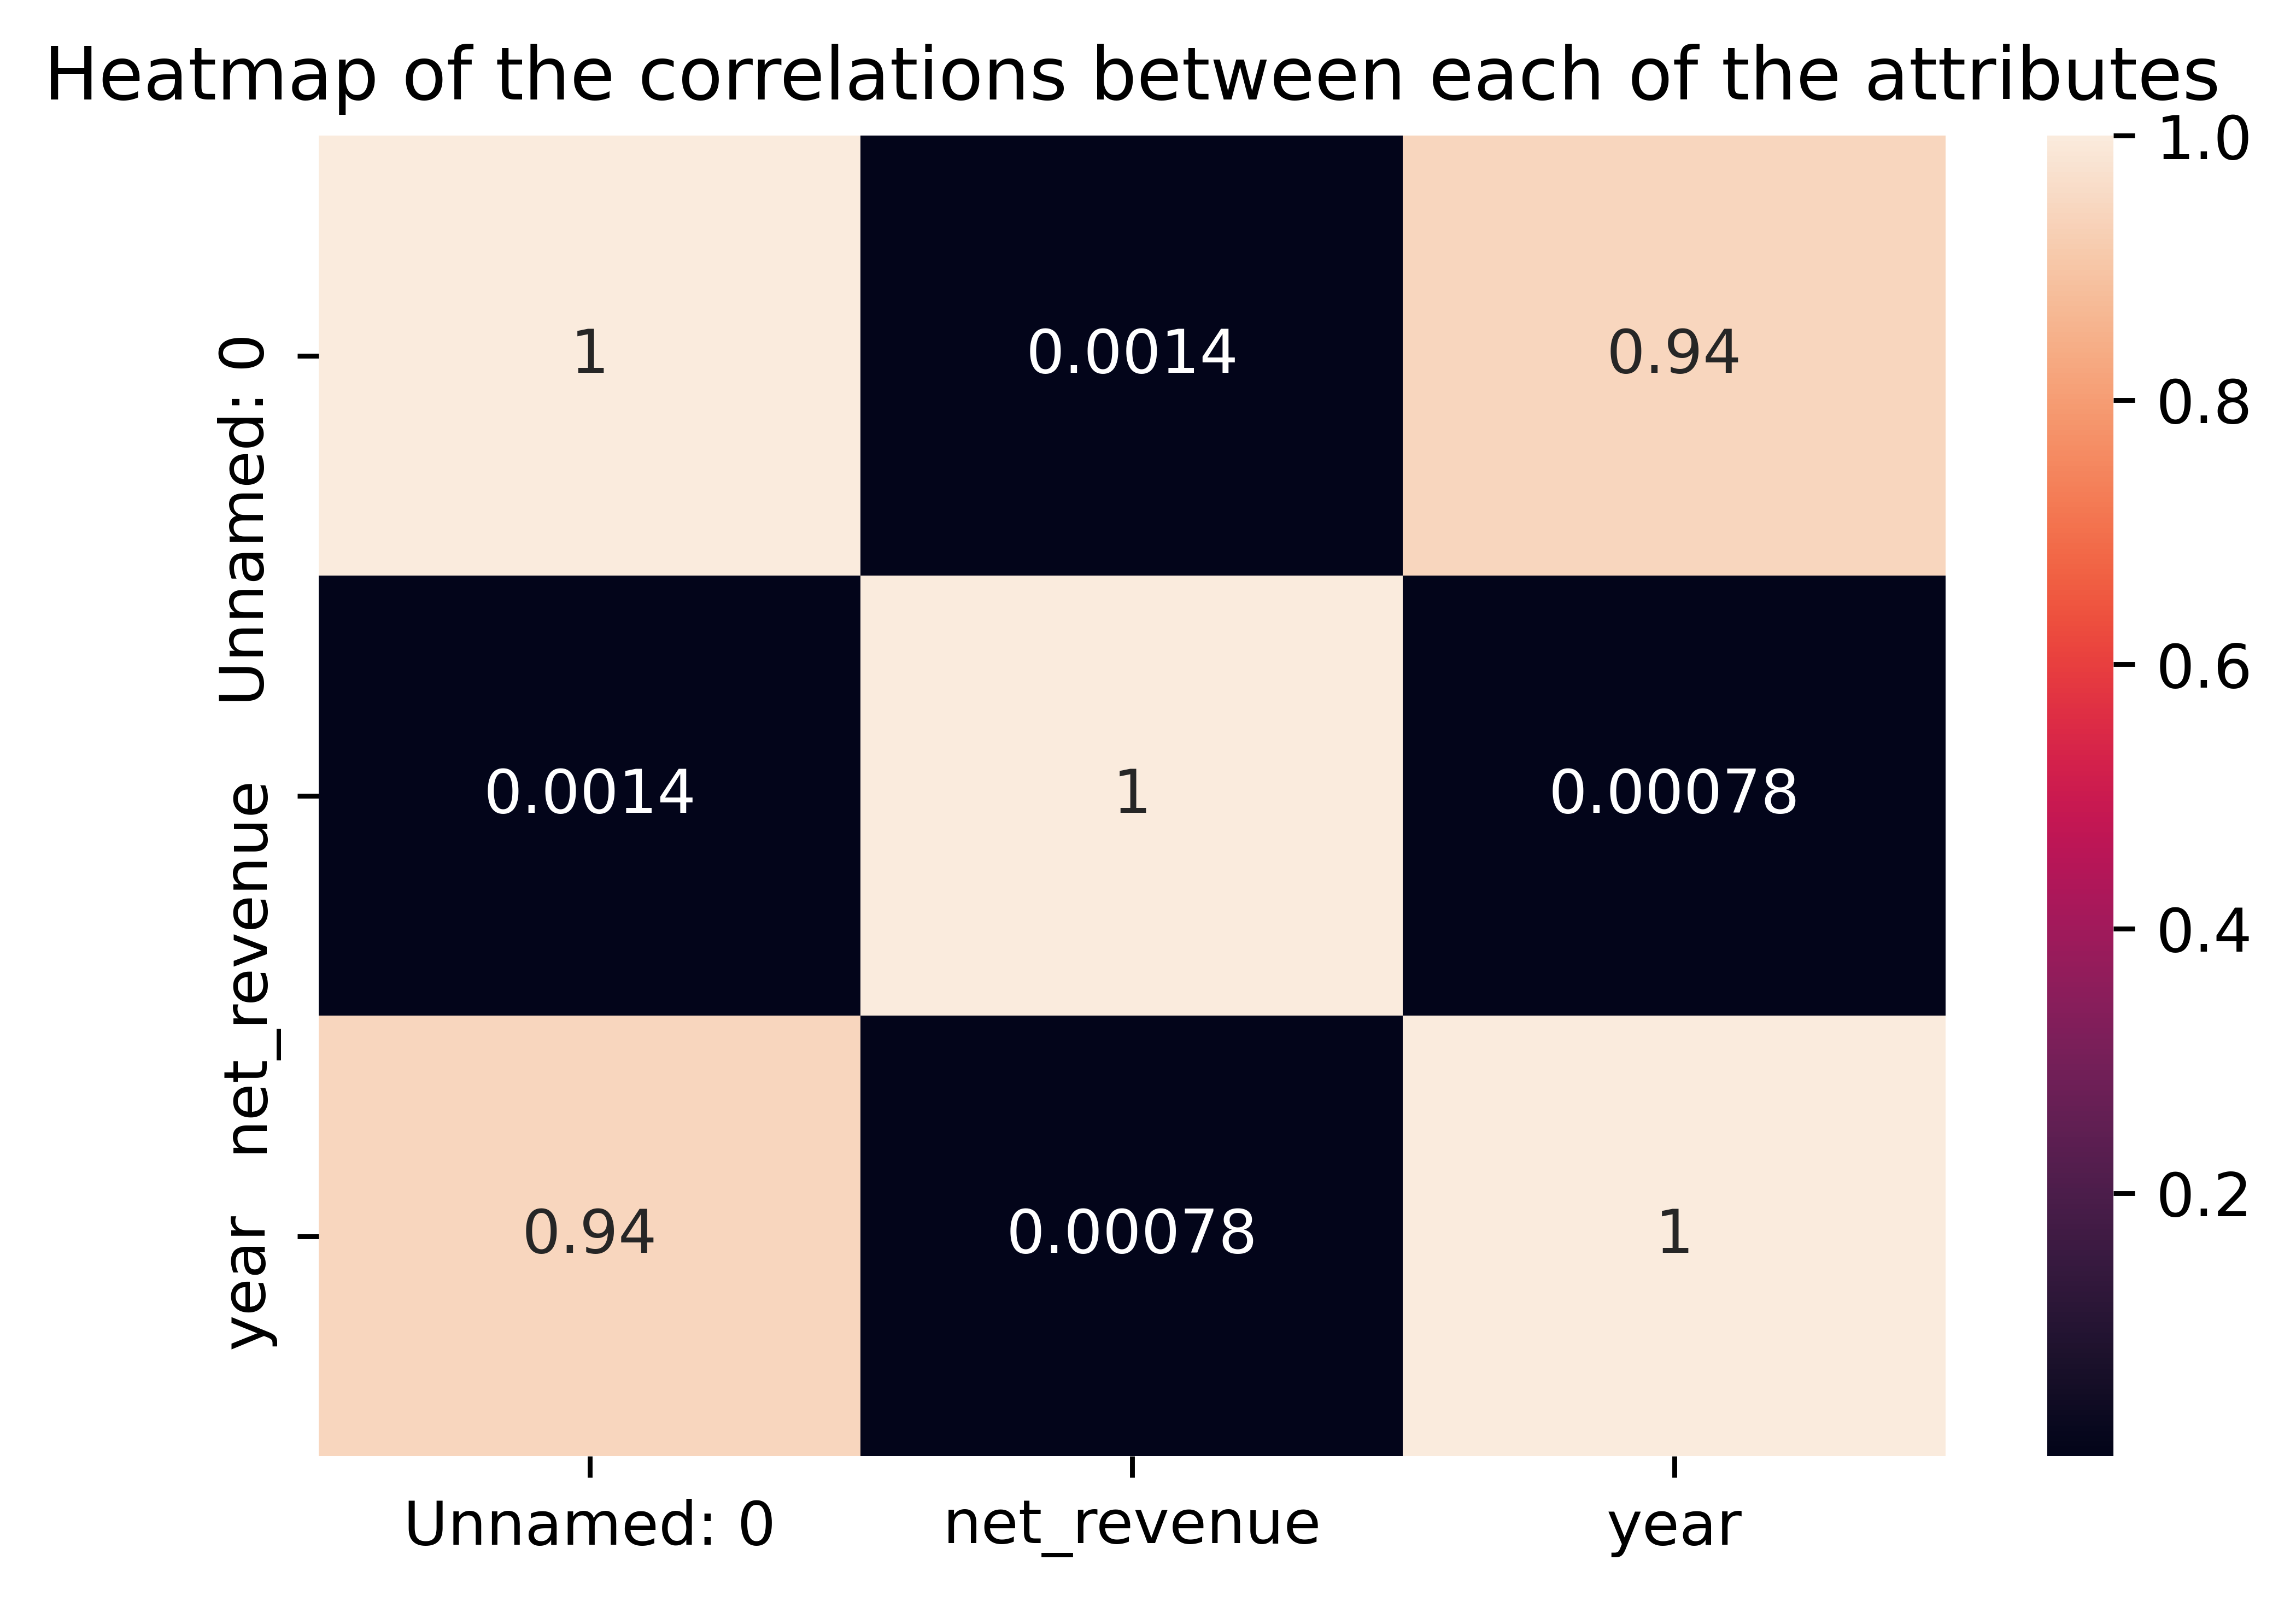

In [18]:
plt.figure(figsize=(6, 4), dpi=800)

sn.heatmap(corr, annot = True)
plt.title('Heatmap of the correlations between each of the attributes')
plt.show()

Observation: The heatmap does not reveal any correlation pattern, hence, we employ other visualization techniques in the form of graphs

##### Graph for Average net_revenue of each year

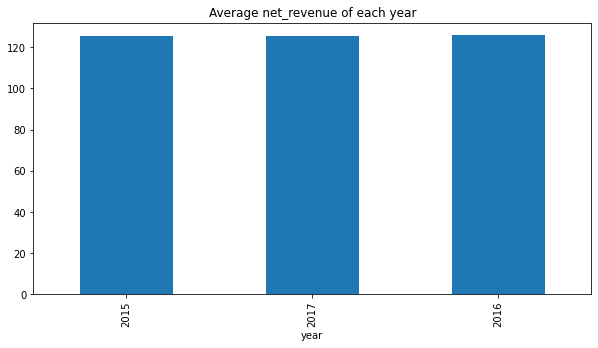

In [19]:
plt.figure(figsize=(10,5))
df.groupby('year')['net_revenue'].mean().sort_values().plot(kind='bar')
plt.title('Average net_revenue of each year')
plt.show()

In the above graph, we observe that every year the revenue has almost remained constant with a slight drop in 2016 and then an increase in 2017

##### Graph for average count of customers each year

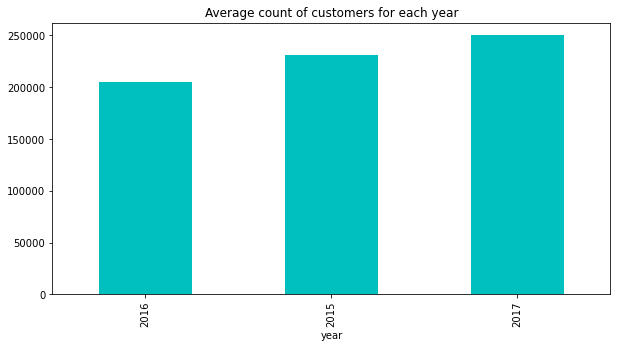

In [20]:
plt.figure(figsize=(10,5))
df.groupby('year')['customer_email'].count().sort_values().plot(kind='bar', color='c')
plt.title('Average count of customers for each year')
plt.show()

Observation: There is an increasing trend of count of customers from the year 2016 till 2017